<a name = "inicio"></a>
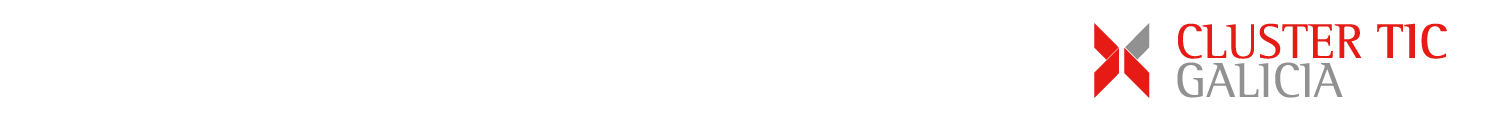

<div style="font-size: 50px;text-align: center;height:70px;line-height: 60px;padding:10px;margin:10px 0 0 0;">Análisis de datos con Pandas</div>

1. [Unión de series y dataframes](#Unión-de-series-y-dataframes)
1. [Multi-indexación](#Multi-indexación)

In [1]:
import numpy as np
import pandas as pd

# Anexión de series y dataframes

Frecuentemente nos encontramos con que los datos a analizar están repartidos entre dos o más bloques de datos, lo que nos obliga a unirlos, bien concatenándolos, o bien realizando un "join" entre las estructuras (combinaciones del mismo tipo que las realizadas en bases de datos). Revisemos las funciones asociadas.

### Anexión de series

Un caso con el que nos encontramos con relativa frecuencia es aquel en el que queremos anexar una serie a otra (es decir, concatenarlas verticalmente). Por ejemplo:

In [2]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [3]:
r = pd.Series([10, 11, 12], index = ["f", "g", "h"])
r

f    10
g    11
h    12
dtype: int64

Si deseamos unir $r$ y $s$ verticalmente en una nueva serie, podemos usar la función [pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html). Esta función permite especificar el eje a lo largo del cual unir los diferentes objetos (pueden ser series o dataframes). Por defecto, la concatenación se realiza a lo largo del eje 0:

In [4]:
pd.concat([s, r])

a     1
b     2
c     3
d     4
e     5
f    10
g    11
h    12
dtype: int64

Por supuesto, el resultado es otra serie Pandas.

Si especificamos como eje de concatenación el eje 1, pandas alineará los valores con idénticas etiquetas. En el siguiente ejemplo, las series $a$ y $b$ tienen algunas etiquetas comunes (y otras no). El resultado incluye todas las etiquetas asignando el valor *NaN* ("Not a Number") a aquellos valores desconocidos:

In [5]:
a = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
a

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [6]:
b = pd.Series([10, 11, 12], index = ["a", "b", "f"])
b

a    10
b    11
f    12
dtype: int64

In [7]:
data = pd.concat([a, b], axis = 1)
data

,0,1
a,1.0,10.0
b,2.0,11.0
c,3.0,NaN
d,4.0,NaN
e,5.0,NaN
f,NaN,12.0


Como puede observarse, el resultado es un dataframe.

Por otro lado, ya sabemos que las etiquetas del índice de una serie no tienen por qué ser diferentes, de forma que si estuviésemos concatenando series con etiquetas comunes en sus índices, el resultado sería equivalente a los vistos hasta ahora:

In [8]:
r = pd.Series([10, 11, 12], index = ["a", "c", "e"])
r

a    10
c    11
e    12
dtype: int64

In [9]:
s = pd.Series([1, 2, 3, 4], index = ["a", "b", "c", "d"])
s

a    1
b    2
c    3
d    4
dtype: int64

In [10]:
pd.concat([s, r])

a     1
b     2
c     3
d     4
a    10
c    11
e    12
dtype: int64

En este ejemplo hemos concatenado dos series que tienen dos etiquetas comunes ($a$ y $c$), y vemos que las dos apariciones de cada una de ellas se incluyen en el resultado de la concatenación.

### Anexión de dataframes

La función [pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) que ya hemos visto es también la responsable de anexar dos o más dataframes a lo largo de un eje, con soporte a lógica de conjuntos a la hora de gestionar etiquetas en ejes no coincidentes. Veamos un primer caso, el más sencillo posible, para el que partimos de los siguientes dos dataframes:

In [11]:
data1 = pd.DataFrame(
    np.arange(9).reshape([3, 3]),
    index = ["a", "b", "d"],
    columns = ["A", "B", "C"]
)
data1

,A,B,C
a,0,1,2
b,3,4,5
d,6,7,8


In [12]:
data2 = pd.DataFrame(
    np.arange(12).reshape([4, 3]),
    index = ["a", "b", "c", "e"],
    columns = ["B", "C", "D"]
)
data2

,B,C,D
a,0,1,2
b,3,4,5
c,6,7,8
e,9,10,11


Si pasamos a la función *concat()* ambos dataframes como primer argumento (en forma de lista), obtenemos el siguiente resultado:

In [13]:
pd.concat([data1, data2])

,A,B,C,D
a,0.0,1,2,NaN
b,3.0,4,5,NaN
d,6.0,7,8,NaN
a,NaN,0,1,2.0
b,NaN,3,4,5.0
c,NaN,6,7,8.0
e,NaN,9,10,11.0


Vemos cómo, por defecto, la concatenación se ha realizado a lo largo del eje 0 (eje vertical), uniendo los índices de fila de ambos dataframes, y alineando las columnas por su etiqueta. Los valores para los que no hay datos se han rellenado con *NaN* (opción correspondiente al argumento por defecto **join = "outer"**).

Si especificamos que la concatenación se realice a lo largo del eje 1 (eje horizontal), el resultado es el siguiente:

In [14]:
pd.concat([data1, data2], axis = 1)

,A,B,C,B,C,D
a,0.0,1.0,2.0,0.0,1.0,2.0
b,3.0,4.0,5.0,3.0,4.0,5.0
d,6.0,7.0,8.0,NaN,NaN,NaN
c,NaN,NaN,NaN,6.0,7.0,8.0
e,NaN,NaN,NaN,9.0,10.0,11.0


De modo semejante al primer ejemplo, se han introducido *NaN*'s allí donde no había datos, y se han alineado las filas por su etiqueta.

Estos dos ejemplos vistos son tipo "*Outer*" (opción por defecto), considerando todas las etiquetas de los dos dataframes aun cuando no sean comunes a ambos. Pero si especificamos el argumento **join = "Inner"**, los resultados pasan a considerar solo las etiquetas comunes. Así, para el primer ejemplo visto tenemos:

In [15]:
pd.concat([data1, data2], join = "inner")

,B,C
a,1,2
b,4,5
d,7,8
a,0,1
b,3,4
c,6,7
e,9,10


incluyendo solo las columnas $B$ y $C$ comunes a ambos dataframes. Y para el segundo ejemplo tenemos:

In [16]:
pd.concat([data1, data2], axis = 1, join = "inner")

,A,B,C,B,C,D
a,0,1,2,0,1,2
b,3,4,5,3,4,5


incluyendo solo las filas $a$ y $b$ comunes a ambos dataframes.

El parámetro **ignore_index** controla el índice a asignar al eje a lo largo del cuál se realiza la concatenación. Si este parámetro toma el valor *False* (por defecto), el eje de concatenación mantiene las etiquetas de los dataframes originales. Si toma el valor *True*, se ignoran dichas etiquetas y el resultado de la concatenación recibe un nuevo índice automático numérico. Por ejemplo, si añadimos al código el argumento **ignore_index = True**, obtenemos el siguiente resultado:

In [17]:
pd.concat([data1, data2], axis = 1, join = "inner", ignore_index = True)

,0,1,2,3,4,5
a,0,1,2,0,1,2
b,3,4,5,3,4,5


### Combinación de dataframes

La función [pandas.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html) nos permite realizar combinaciones (*"joins"*) entre tablas. El join es realizado considerando como claves los valores de columnas o los índices de filas. En el primer caso, las etiquetas de las filas son ignoradas. En cualquier otro caso (joins realizado entre etiquetas de filas, o entre etiquetas de filas y valores de columnas), las etiquetas de filas se mantienen.

Veamos un primer ejemplo. Partimos de dos tablas conteniendo las ventas y costes de producción para varios meses:

In [18]:
data1 = pd.DataFrame({
    "month": ["jan", "feb", "mar", "may"],
    "sales": [14, 8, 12, 17]
})
data1

,month,sales
0,jan,14
1,feb,8
2,mar,12
3,may,17


In [19]:
data2 = pd.DataFrame({
    "month": ["feb", "jan", "mar", "apr"],
    "costs": [7, 6, 8, 5]
})
data2

,month,costs
0,feb,7
1,jan,6
2,mar,8
3,apr,5


Vemos que ambos dataframes tienen una columna común ("*month*") y varias filas comunes ("*jan*", "*feb*" y "*mar*"). Obsérvese que en $data2$ las filas no están ordenadas y que, en $data1$, el mes de enero ("*jan*") tiene índice 0 mientras que, en $data2$, el mes de enero tiene índice 1.

Si aplicamos la función *merge.()* a estos dataframes con los valores por defecto, obtenemos el siguiente resultado:

In [20]:
pd.merge(data1, data2)

,month,sales,costs
0,jan,14,6
1,feb,8,7
2,mar,12,8


Este resultado supone que el join se realiza considerando como claves los valores de las columnas comune,s y que es de tipo "*inner*" (considera solo las filas con valores comunes en las columnas usadas para realizar el join).

Si especificamos que el join sea de tipo "*outer*", lo que definimos con el parámetro **how**, el resultado considerará todas las etiquetas presentes en las columnas comunes de ambos dataframes:

In [21]:
pd.merge(data1, data2, how = "outer")

,month,sales,costs
0,jan,14.0,6.0
1,feb,8.0,7.0
2,mar,12.0,8.0
3,may,17.0,NaN
4,apr,NaN,5.0


Como vemos, se ha rellenado con *NaN*'s los valores inexistentes. Otras opciones para el parámetro *how* son "*left*" y "*right*" (además de la opción por defecto, "*outer*").

Ya se ha comentado que, por defecto, el join se realiza considerando las columnas comunes. Sin embargo, esto es controlable usando el parámetro **on** y especificando la columna o columnas a usar. Por ejemplo, consideremos los siguientes dataframes:

In [22]:
data1 = pd.DataFrame({
    "month": ["jan", "jan", "feb", "feb"],
    "product": ["A", "B", "A", "B"],
    "sales": [14, 8, 12, 17]
})
data1

,month,product,sales
0,jan,A,14
1,jan,B,8
2,feb,A,12
3,feb,B,17


In [23]:
data2 = pd.DataFrame({
    "month": ["jan", "jan", "feb", "feb"],
    "product": ["A", "B", "A", "B"],
    "costs": [7, 6, 8, 5]
})
data2

,month,product,costs
0,jan,A,7
1,jan,B,6
2,feb,A,8
3,feb,B,5


Hay dos columnas comunes, lo que supone que el resultado de un merge por defecto sería el siguiente:

In [24]:
pd.merge(data1, data2)

,month,product,sales,costs
0,jan,A,14,7
1,jan,B,8,6
2,feb,A,12,8
3,feb,B,17,5


Es decir, para cada combinación de $mes-producto$ se añadirían los valores de los campos de ventas y coste. Si quisiéramos que el join se realizase considerando solo uno de los campos -*product*, por ejemplo-, bastaría con especificarlo con el parámetro **on**:

In [25]:
pd.merge(data1, data2, on = "product")

,month_x,product,sales,month_y,costs
0,jan,A,14,jan,7
1,jan,A,14,feb,8
2,feb,A,12,jan,7
3,feb,A,12,feb,8
4,jan,B,8,jan,6
5,jan,B,8,feb,5
6,feb,B,17,jan,6
7,feb,B,17,feb,5


Además del campo utilizado para realizar el join ("*product*"), al existir un campo común a ambos dataframes ("*month*") que no se desea usar para el join, pandas añade un sufijo (configurable) a este campo en ambas tablas para poder diferenciarlo.

También podría ocurrir que ambos dataframes no tuviesen columnas comunes (columnas con el mismo nombre) pero que, aun así, quisiéramos realizar el join considerando como claves algunas de ellas. Por ejemplo:

In [26]:
data1 = pd.DataFrame({
    "month": ["jan", "feb", "mar", "may"],
    "sales": [14, 8, 12, 17]
})
data1

,month,sales
0,jan,14
1,feb,8
2,mar,12
3,may,17


In [27]:
data2 = pd.DataFrame({
    "month_name": ["feb", "jan", "mar", "apr"],
    "cost": [7, 6, 8, 5]
})
data2

,month_name,cost
0,feb,7
1,jan,6
2,mar,8
3,apr,5


Al no haber columnas comunes, la ejecución de la función *merge()* devolvería un error. En este caso podemos usar los parámetros **left_on** y **right_on** para especificar el campo a usar como clave en la tabla de la izquierda del join y en la de la derecha, respectivamente:

In [28]:
pd.merge(data1, data2, left_on = "month", right_on = "month_name")

,month,sales,month_name,cost
0,jan,14,jan,6
1,feb,8,feb,7
2,mar,12,mar,8


Vemos cómo se realiza el join correctamente y se mantienen las columnas originales.

##### Join por índice de filas

Si queremos que el join considere los valores del índice de filas -y no los valores de columnas- de alguno de los dataframes para realizar el join, podemos usar los parámetros **left_index** y **right_index**.

Supongamos, por ejemplo, que partimos de los siguientes dataframes:

In [29]:
data1 = pd.DataFrame({
    "month": ["jan", "feb", "mar", "may"],
    "sales": [14, 8, 12, 17]
})
data1

,month,sales
0,jan,14
1,feb,8
2,mar,12
3,may,17


In [30]:
data2 = pd.DataFrame({
    "purchases": [5, 9, 11, 2, 6]
},
    index = ["jan", "feb", "mar", "apr", "may"]
)
data2

,purchases
jan,5
feb,9
mar,11
apr,2
may,6


La ejecución de la función *merge()* no sería posible -devolvería un error- pues no hay columnas columnes. En este caso querríamos que para el dataframe $data1$ se considerase como clave la columna "*month*" -usando el parámetro *left_on*- y para el dataframe $data2$ el índice del dataframe -usando el parámetro *right_index*-, de la siguiente forma:

In [31]:
pd.merge(data1, data2, left_on = "month", right_index = True)

,month,sales,purchases
0,jan,14,5
1,feb,8,9
2,mar,12,11
3,may,17,6


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Multi-indexación

Hasta ahora hemos visto series y dataframes pandas con índices sencillos, pero pueden tener también **índices jerárquicos** o **multi-índices**, lo que abre la puerta a sofisticados procesos de manipulación y análisis de datos.

Podemos imaginarnos un multi-índice como un índice en el que cada valor es una tupla única de elementos. Es posible crear estos multi-índices y extraerlos posteriormente de varias formas.

### Creación de multi-índices

Podemos crear un multi-índice de cuatro formas distintas:

* A partir de una lista de arrays, usando el método [pd.MultiIndex.from_arrays()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.from_arrays.html)
* A partir de un array de tuplas, usando el método [pd.MultiIndex.from_tuples()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.from_tuples.html)
* A partir del producto cartesiano de los valores de dos iterables, usando el método [pd.MultiIndex.from_product()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.from_product.html)
* A partir de un DataFrame, usando el método [pd.MultiIndex.from_frame()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.from_frame.html)

Veamos un ejemplo de cada tipo.

##### Multi-índices a partir de una lista de arrays

El primer método es aquel en el que creamos el multi-índice indicando cada una de las columnas que lo van a formar. Por ejemplo:

In [32]:
index = pd.MultiIndex.from_arrays(
    [
        [2018, 2018, 2018, 2019, 2019, 2019],
        ["Spain", "Portugal", "France", "Spain", "Portugal", "France"]
    ],
    names = ["Year", "Country"]
)
index

MultiIndex([(2018,    'Spain'),
            (2018, 'Portugal'),
            (2018,   'France'),
            (2019,    'Spain'),
            (2019, 'Portugal'),
            (2019,   'France')],
           names=['Year', 'Country'])

Como vemos, el parámetro **names** nos permite especificar los nombres de los niveles del índice jerárquico.

Si llevamos este multi-índice a un dataframe obtenemos el siguiente resultado:

In [33]:
data = pd.DataFrame(
    data = [18, 20, 10, 15, 12, 18],
    index = index,
    columns = ["Sales"]
)
data

Sales
Year Country        
2018 Spain        18
     Portugal     20
     France       10
2019 Spain        15
     Portugal     12
     France       18

##### Multi-índices a partir de un array de tuplas

En este segundo método indicamos los valores del multi-índice valor por valor, siendo éstos tuplas:

In [34]:
index = pd.MultiIndex.from_tuples(
    [
    (2018, "Spain"),
    (2018, "Portugal"),
    (2018, "France"),
    (2019, "Spain"),
    (2019, "Portugal"),
    (2019, "France")
    ],
    names = ["Year", "Country"])
index

MultiIndex([(2018,    'Spain'),
            (2018, 'Portugal'),
            (2018,   'France'),
            (2019,    'Spain'),
            (2019, 'Portugal'),
            (2019,   'France')],
           names=['Year', 'Country'])

Seguimos teniendo a nuestra disposición el parámetro *names* para especificar los nombres de los niveles.

Si creamos nuestro DataFrame vemos que el resultado es el mismo que el que habíamos obtenido previamente:

In [35]:
data = pd.DataFrame(
    data = [18, 20, 10, 15, 12, 18],
    index = index,
    columns = ["Sales"]
)
data

Sales
Year Country        
2018 Spain        18
     Portugal     20
     France       10
2019 Spain        15
     Portugal     12
     France       18

##### Multi-índices por producto cartesiano de arrays

El tercer método nos permite especificar los valores (únicos) de los diferentes niveles, creándose el índice jerárquico como resultado del producto cartesiano de los valores. Por ejemplo:

In [36]:
index = pd.MultiIndex.from_product(
    [
        [2018, 2019],
        ["Spain", "Portugal", "France"]
    ],
    names = ["Year", "Country"]
)
index

MultiIndex([(2018,    'Spain'),
            (2018, 'Portugal'),
            (2018,   'France'),
            (2019,    'Spain'),
            (2019, 'Portugal'),
            (2019,   'France')],
           names=['Year', 'Country'])

Nuevamente, el parámetro *names* nos permite dar nombre a los niveles.

El resultado de llevar este índice a nuestro DataFrame es el ya conocido:

In [37]:
data = pd.DataFrame(
    data = [18, 20, 10, 15, 12, 18],
    index = index,
    columns = ["Sales"]
)
data

Sales
Year Country        
2018 Spain        18
     Portugal     20
     France       10
2019 Spain        15
     Portugal     12
     France       18

##### Multi-índices a partir de un DataFrame

Por último, podemos crear el multi-índice a partir de un DataFrame en el que cada columna coincide con una columna del multi-índice. Comencemos creando el DataFrame:

In [38]:
df = pd.DataFrame({
    "Year": [2018, 2018, 2018, 2019, 2019, 2019],
    "Country": ["Spain", "Portugal", "France", "Spain", "Portugal", "France"]
})
df

,Year,Country
0,2018,Spain
1,2018,Portugal
2,2018,France
3,2019,Spain
4,2019,Portugal
5,2019,France


Ahora podemos crear el índice:

In [39]:
index = pd.MultiIndex.from_frame(df)
index

MultiIndex([(2018,    'Spain'),
            (2018, 'Portugal'),
            (2018,   'France'),
            (2019,    'Spain'),
            (2019, 'Portugal'),
            (2019,   'France')],
           names=['Year', 'Country'])

y nuestro DataFrame con índice jerárquico:

In [40]:
data = pd.DataFrame(
    data = [18, 20, 10, 15, 12, 18],
    index = index,
    columns = ["Sales"]
)
data

Sales
Year Country        
2018 Spain        18
     Portugal     20
     France       10
2019 Spain        15
     Portugal     12
     France       18

### Extracción de un nivel del índice

Trabajando con un DataFrame o una Serie pandas con multi-índice, es posible extraer los valores de un nivel del índice con el método **.get_level_values()**. El argumento que deberemos pasar a este método será, o el número del nivel, o su nombre -si es que el índice ha recibido nombres-. Por ejemplo, partimos del DataFrame que hemos creado en las secciones anteriores:

In [41]:
index = pd.MultiIndex.from_product(
    [[2018, 2019],["Spain", "Portugal", "France"]],
    names = ["Year", "Country"]
)
data = pd.DataFrame(
    data = [18, 20, 10, 15, 12, 18],
    index = index,
    columns = ["Sales"]
)
data

Sales
Year Country        
2018 Spain        18
     Portugal     20
     France       10
2019 Spain        15
     Portugal     12
     France       18

La columna de etiquetas del multi-índice situada en el extremo izquierdo es la que recibe el número (el índice) 0. Por lo tanto:

In [42]:
data.index.get_level_values(0)

Index([2018, 2018, 2018, 2019, 2019, 2019], dtype='int64', name='Year')

De forma semejante:

In [43]:
data.index.get_level_values(1)

Index(['Spain', 'Portugal', 'France', 'Spain', 'Portugal', 'France'], dtype='object', name='Country')

Si pasamos como argumento el nombre de la columna del índice obtenemos resultados semejantes:

In [44]:
data.index.get_level_values("Year")

Index([2018, 2018, 2018, 2019, 2019, 2019], dtype='int64', name='Year')

In [45]:
data.index.get_level_values("Country")

Index(['Spain', 'Portugal', 'France', 'Spain', 'Portugal', 'France'], dtype='object', name='Country')

### Selección con multi-índices

El trabajar con estructuras pandas con multi-índices nos ofrece nuevos métodos de selección de datos. Si seguimos trabajando con el mismo DataFrame que en las secciones anteriores:

In [46]:
data

Sales
Year Country        
2018 Spain        18
     Portugal     20
     France       10
2019 Spain        15
     Portugal     12
     France       18

podríamos extraer, por ejemplo, las filas correspondientes al año 2018 con la siguiente expresión:

In [47]:
data.loc[2018]

,Sales
Country,
Spain,18
Portugal,20
France,10


O extraer el valor del campo "*Sales*" correspondiente al año 2018 y el país "Spain" con la siguiente expresión:

In [48]:
data.loc[(2018, "Spain")]

Sales    18
Name: (2018, Spain), dtype: int64

### Aplicación de funciones estadísticas

Usando multi-índices, también es posible aplicar funciones estadísticas al DataFrame o a la Serie especificando el nivel de la jerarquía al que aplicarlas. Por ejemplo, si seguimos trabajando con el mismo DataFrame que hemos visto:

In [49]:
data

Sales
Year Country        
2018 Spain        18
     Portugal     20
     France       10
2019 Spain        15
     Portugal     12
     France       18

podemos calcular el valor medio de las ventas, como ya sabemos con el método *.mean()*:

In [50]:
data.mean()

Sales    15.5
dtype: float64

Pero si especificamos el nivel al que queremos aplicarlo usando el método *.groupby()*, el DataFrame se agrega según los valores de dicho nivel antes de realizar la operación. Por ejemplo:

In [51]:
data.groupby("Year").mean()

,Sales
Year,
2018,16.0
2019,15.0


O el valor medio por país:

In [52]:
data.groupby("Country").mean()

,Sales
Country,
France,14.0
Portugal,16.0
Spain,16.5


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>